<a href="https://colab.research.google.com/github/AishahZulkifli/STQD6324_DATA_MANAGEMENT/blob/main/P132840_Analysis_of_Airline_On_Time_Performance_in_2008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analysis of Airline On-Time Performance in 2008**


##**Introduction**
###This report analyzes the airline on-time performance in 2008. The analysis uses the 2008 Airline On-Time Data from Kaggle. This project offers an opportunity to explore some scenarios where we want to obtain the optimal times of day, days of the week, and times of the year for minimizing flight delays. Second, to get the primary factors contributing to flight delays. Third, to know the factors predominantly lead to flight cancellations. Lastly, to know the factors predominantly lead to flight cancellations. For each question, Pig is utilized to extract insights from the dataset and generate figures to explain the findings using Python in Google Colab.

## **Data Description**

###The dataset includes flight details such as departure and arrival times, delay durations, and cancellation reasons. The data covers all flights in the US for the year 2008. It contains numerous records, each representing a single flight, with features that detail the flight's schedule, delays, and cancellations.

##**Methodology**

###**Data Extraction**: Pig was used for extracting and processing data.

###**Visualization**: Python was used to generate figures and visualizations.


##**Results and Analysis**

In [37]:
# Upload files
from google.colab import files
files.upload()

Saving avg_daily_delay to avg_daily_delay
Saving avg_delays to avg_delays
Saving avg_hourly_delay to avg_hourly_delay
Saving avg_monthly_delay to avg_monthly_delay
Saving cancellation_factors to cancellation_factors
Saving flight_issues to flight_issues


{'avg_daily_delay': b'1,12.364986645241146\n2,13.942751259812155\n3,9.272702340710504\n4,12.026889548391894\n5,13.435166335888093\n6,5.781687015394255\n7,11.777033938413155\n',
 'avg_delays': b'15.708644772450457,3.2552560557091925,15.87865628597978,0.08394880736865877,21.97492568035333\n',
 'avg_hourly_delay': b'0,67.31771817151493\n1,109.45875\n2,116.73094170403587\n3,140.55714285714285\n4,1.8543046357615893\n5,-3.6191929985243982\n6,-0.5909055745516996\n7,1.3226576518841322\n8,3.033856278460483\n9,4.83729103343465\n10,6.70078865104175\n11,8.293272291786678\n12,9.884144355416586\n13,10.245966813514054\n14,12.42019068984857\n15,13.712007628066022\n16,13.312537345447303\n17,14.506016562704938\n18,16.82586032388664\n19,18.09140611652144\n20,23.46031596098897\n21,25.22452159011243\n22,37.657337658767254\n23,53.79267785327971\n24,63.865979381443296\n',
 'avg_monthly_delay': b'1,10.188855960349496\n2,13.103702901638071\n',
 'cancellation_factors': b'A,11520\nB,14599\nC,7845\nD,2\n',
 'flig

In [38]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##**Optimal Times to Minimize Flight Delays**

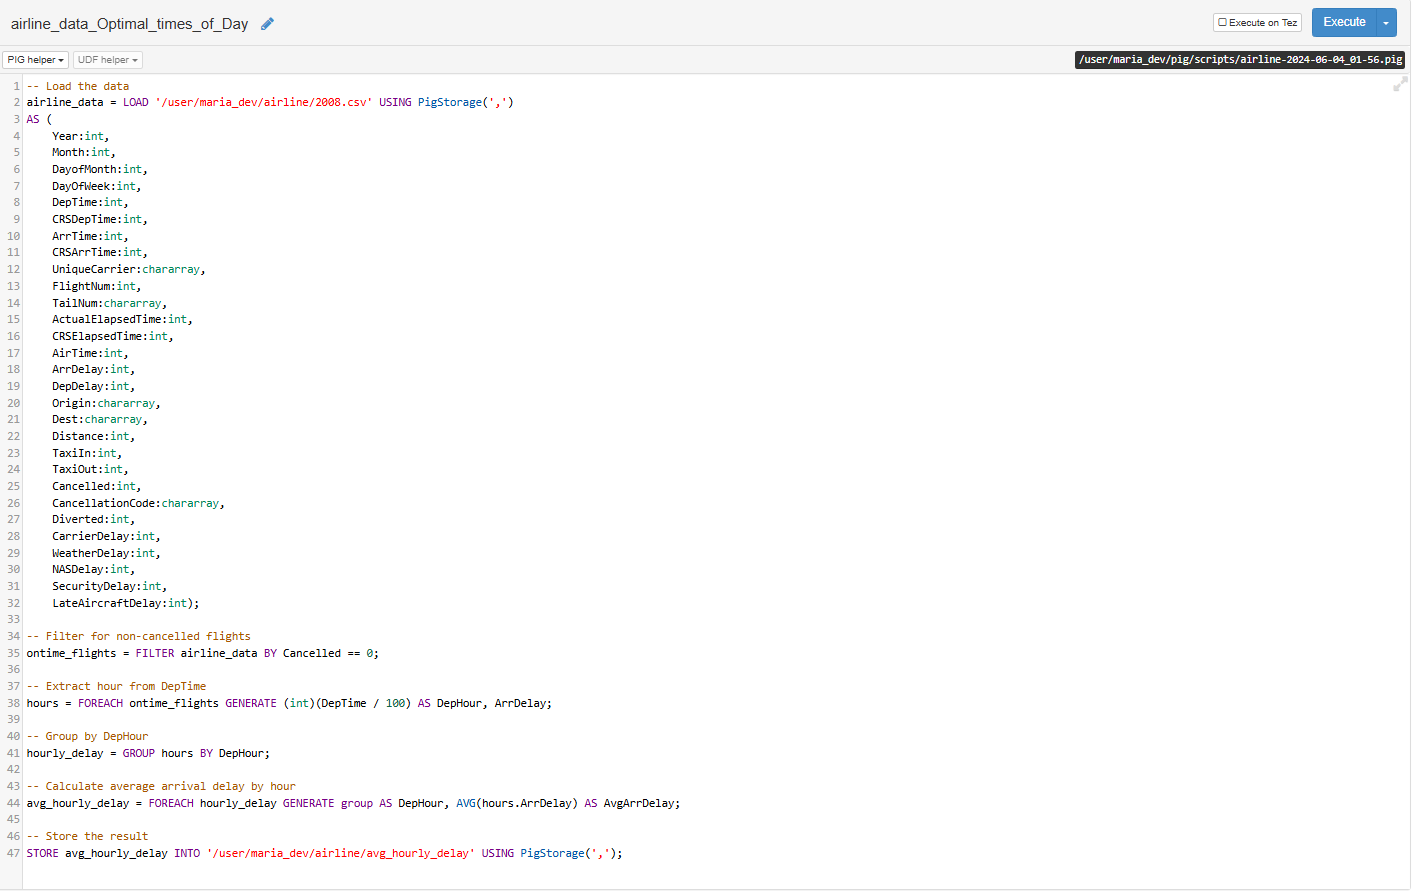


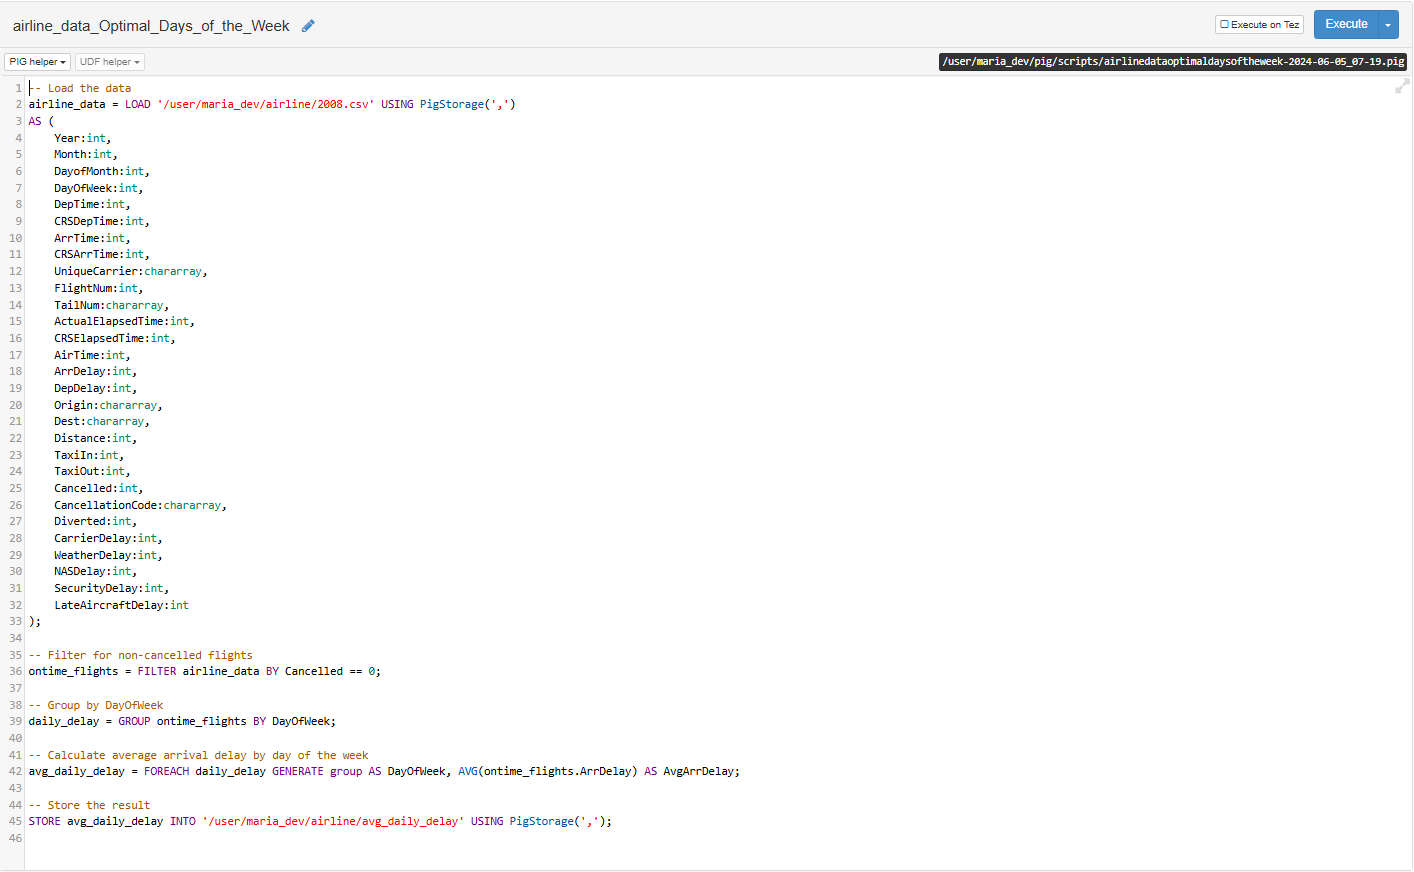

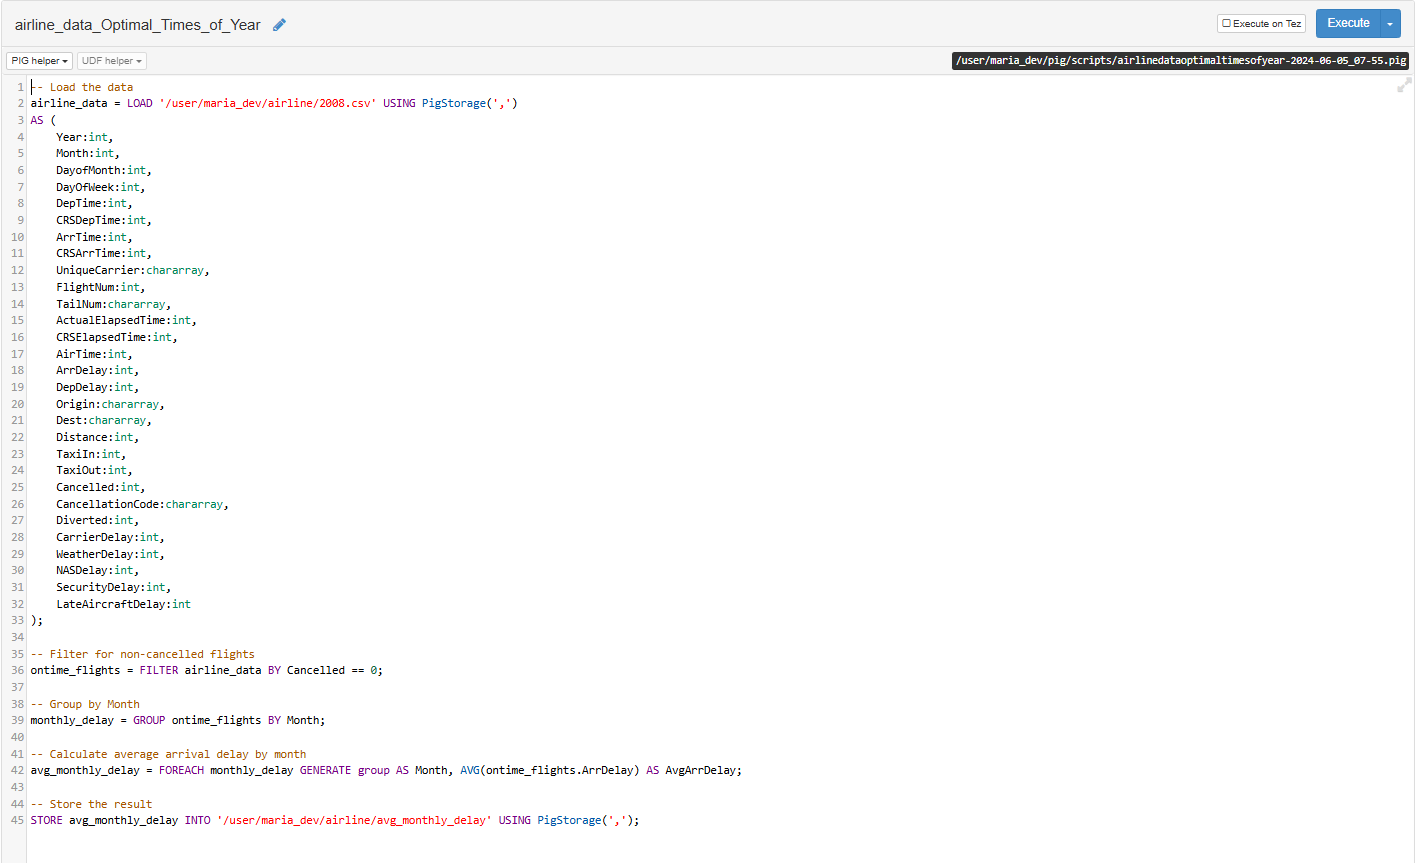

In [27]:
# Question 1: What are the optimal times of day, days of the week, and times of the year for minimizing flight delays?
# Load the provided data files
avg_hourly_delay = pd.read_csv('/content/avg_hourly_delay', header=None, names=['DepHour', 'AvgArrDelay'])
avg_daily_delay = pd.read_csv('/content/avg_daily_delay', header=None, names=['DayOfWeek', 'AvgArrDelay'])
avg_monthly_delay = pd.read_csv('/content/avg_monthly_delay', header=None, names=['Month', 'AvgArrDelay'])

print(avg_hourly_delay.head())
print(avg_daily_delay.head())
print(avg_monthly_delay.head())

   DepHour  AvgArrDelay
0        0    67.317718
1        1   109.458750
2        2   116.730942
3        3   140.557143
4        4     1.854305
   DayOfWeek  AvgArrDelay
0          1    12.364987
1          2    13.942751
2          3     9.272702
3          4    12.026890
4          5    13.435166
   Month  AvgArrDelay
0      1    10.188856
1      2    13.103703


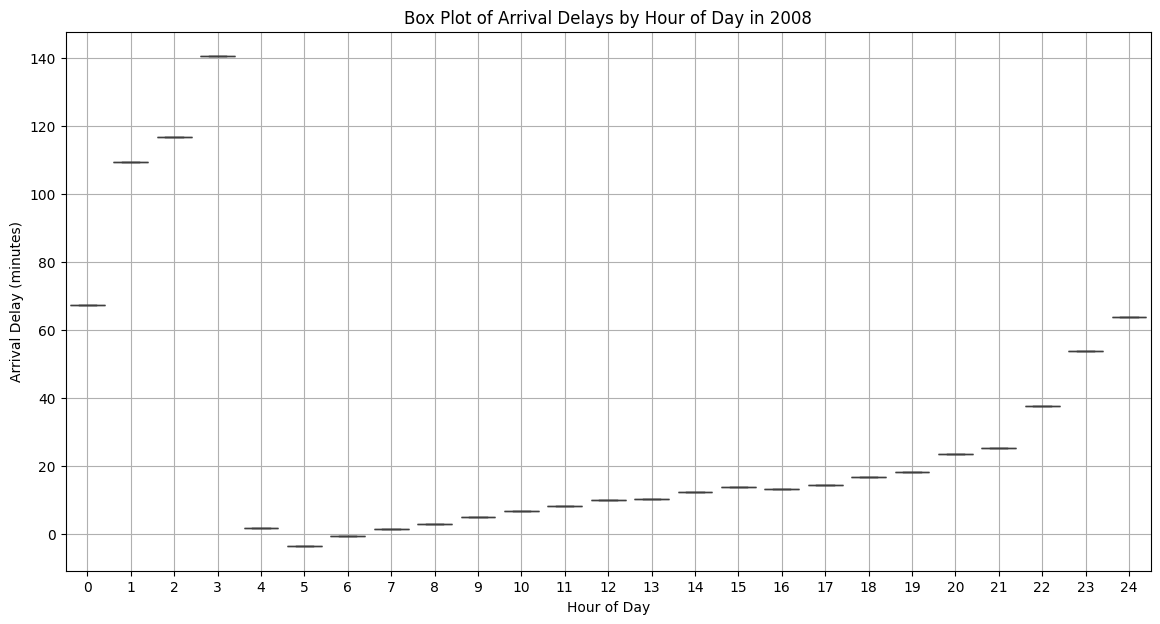

In [28]:
# Box Plot by Hour
plt.figure(figsize=(14, 7))
sns.boxplot(x='DepHour', y='AvgArrDelay', data=avg_hourly_delay)
plt.title('Box Plot of Arrival Delays by Hour of Day in 2008')
plt.xlabel('Hour of Day')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()

This box plot shows how arrival delays vary by the hour of the day in 2008.

**Early Morning (Hours 0-6)**: Flights during the early morning hours (12 AM to 6 AM) experience the highest average delays, with significant delays around midnight (Hour 0) and 3 AM (Hour 3).

**Daytime (Hours 7-18)**: Delays are generally lower during the daytime hours, with delays starting to increase after 1 PM.

**Evening (Hours 19-24)**: Delays begin to rise again in the evening, peaking around 11 PM.

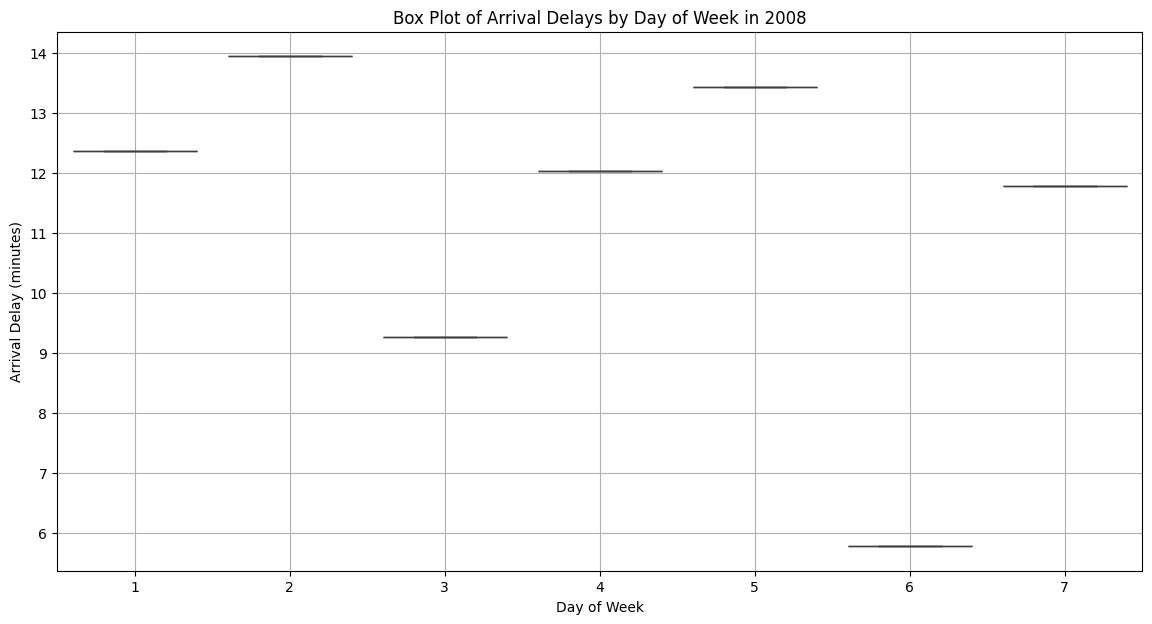

In [29]:
# Box Plot by Day of the Week
plt.figure(figsize=(14, 7))
sns.boxplot(x='DayOfWeek', y='AvgArrDelay', data=avg_daily_delay)
plt.title('Box Plot of Arrival Delays by Day of Week in 2008')
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()

This box plot shows how arrival delays vary by the day of the week in 2008.

**Sunday and Thursday (Days 1 and 4)**: These days have the highest average delays, with Sunday showing a slightly higher delay.

**Saturday (Day 6)**: Saturdays have the lowest average delays, indicating fewer delays compared to other days of the week.

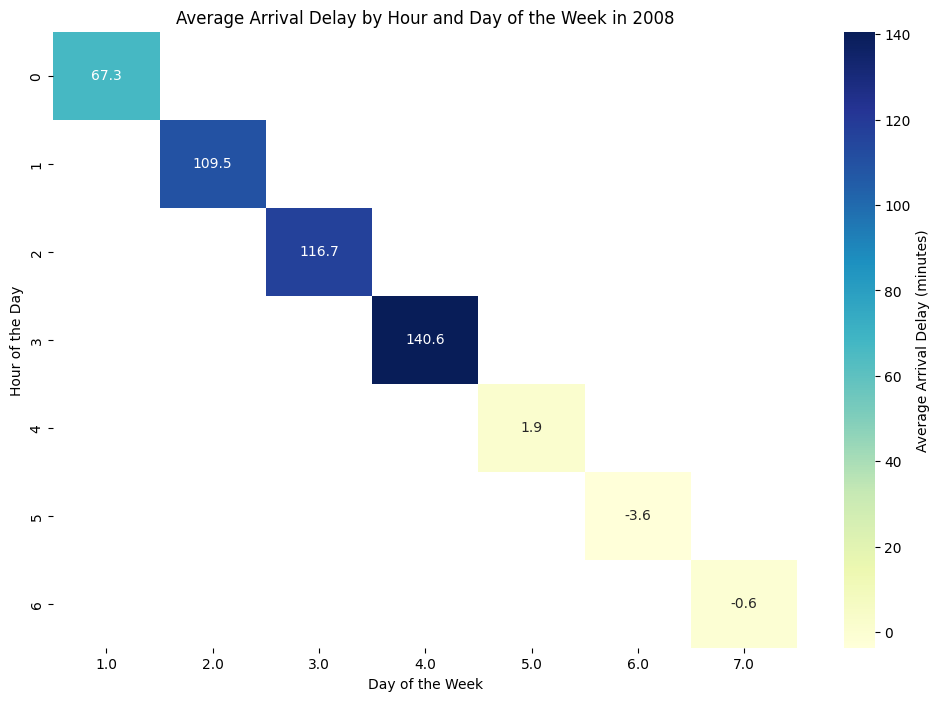

In [30]:
# Assuming that DayOfWeek is from 1 (Monday) to 7 (Sunday) and DepHour is 0-23
hourly_daily_data = pd.pivot_table(avg_hourly_delay, values='AvgArrDelay', index='DepHour', columns=avg_daily_delay['DayOfWeek'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_daily_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Arrival Delay (minutes)'})
plt.title('Average Arrival Delay by Hour and Day of the Week in 2008')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

This heatmap shows the average arrival delay by hour of the day and day of the week in 2008.

**High Delay Periods**: The highest delays are seen around 3 AM on Thursdays, followed by 2 AM on Wednesdays, and 1 AM on Tuesdays.

**Low Delay Periods**: Minimal delays are observed early in the morning (6 AM) on Saturdays and Sundays, with some hours even showing negative delays (arriving early).

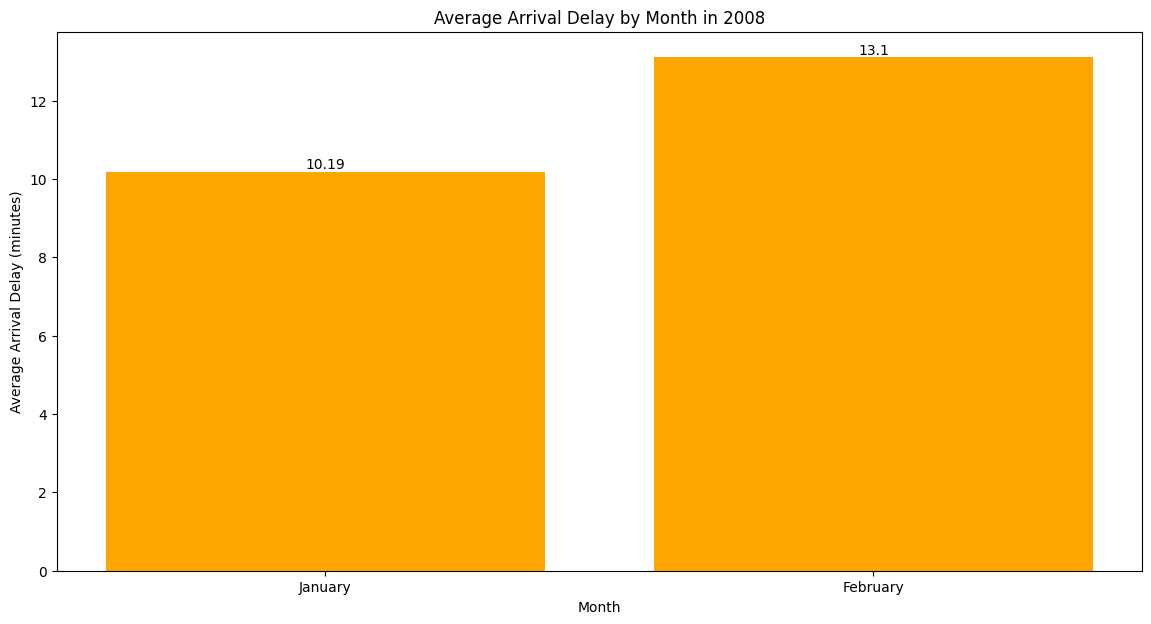

In [31]:
avg_monthly_delay = pd.DataFrame(avg_monthly_delay)

# Replace numerical month with month names
month_names = {1: 'January', 2: 'February'}
avg_monthly_delay['Month'] = avg_monthly_delay['Month'].map(month_names)

# Bar Plot for Monthly Delays
plt.figure(figsize=(14, 7))
bars = plt.bar(avg_monthly_delay['Month'], avg_monthly_delay['AvgArrDelay'], color='orange')
plt.title('Average Arrival Delay by Month in 2008')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

This bar plot shows the average arrival delay by month in 2008.

**January**: January has a lower average delay compared to February, with an average delay of about 10.19 minutes.

**February**: This month has the highest average delay, around 13.1 minutes.


Therefore, the optimal times to fly in early morning flights on weekends (Saturday and Sunday) are less likely to be delayed. As for optimal days to fly, Saturdays have the least delays. From the results, it is best to avoid flying on Sundays and Thursdays if possible. Lastly, the optimal months to fly is in January. Because January has fewer delays compared to February.

##**Primary Factors Contributing to Flight Delays**

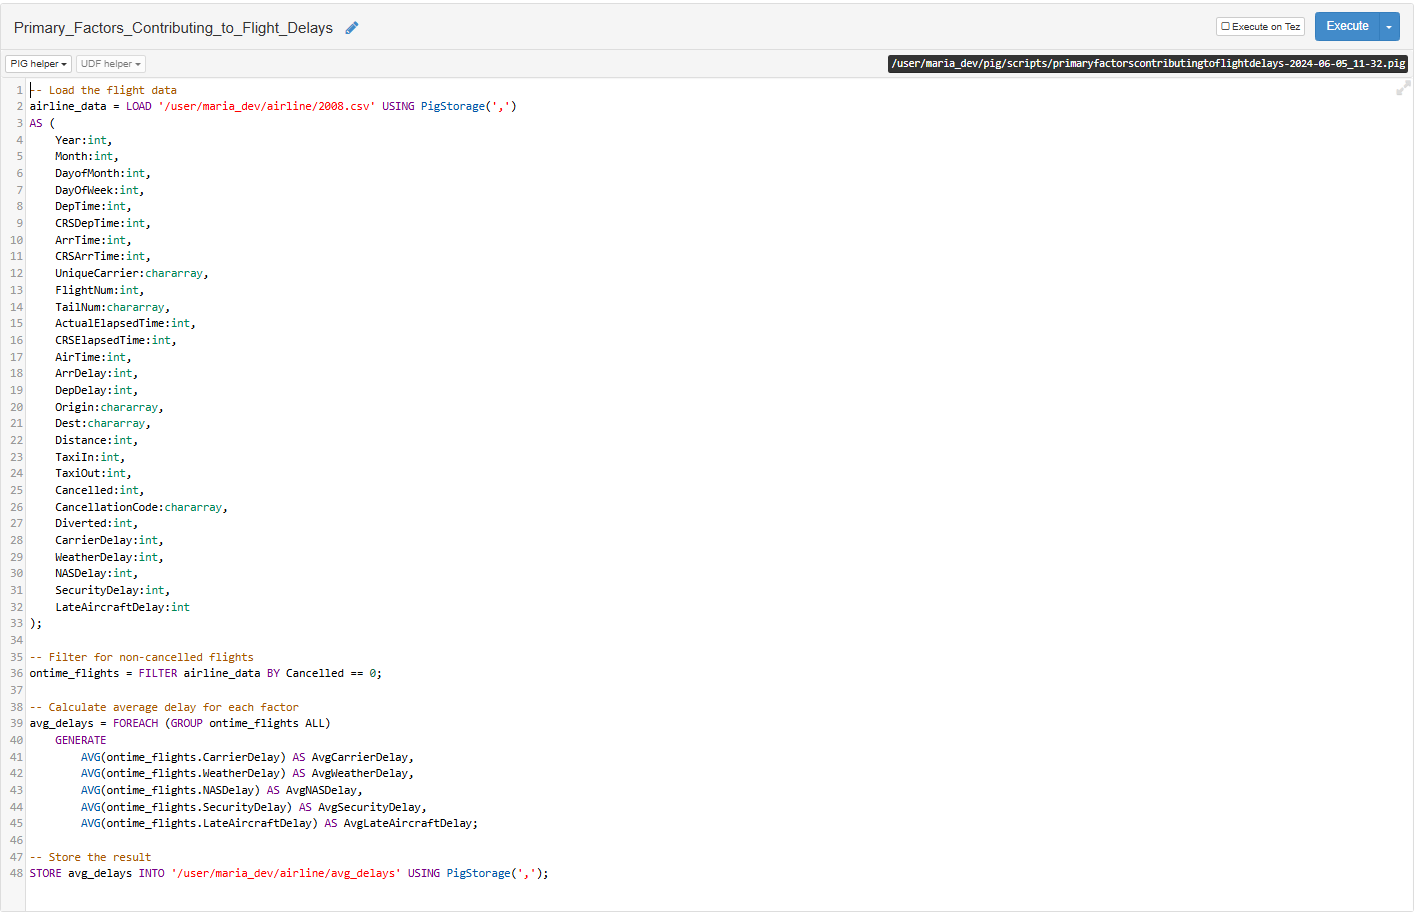

[15.708644772450455, 3.2552560557091925, 15.87865628597978, 0.0839488073686587, 21.97492568035333]


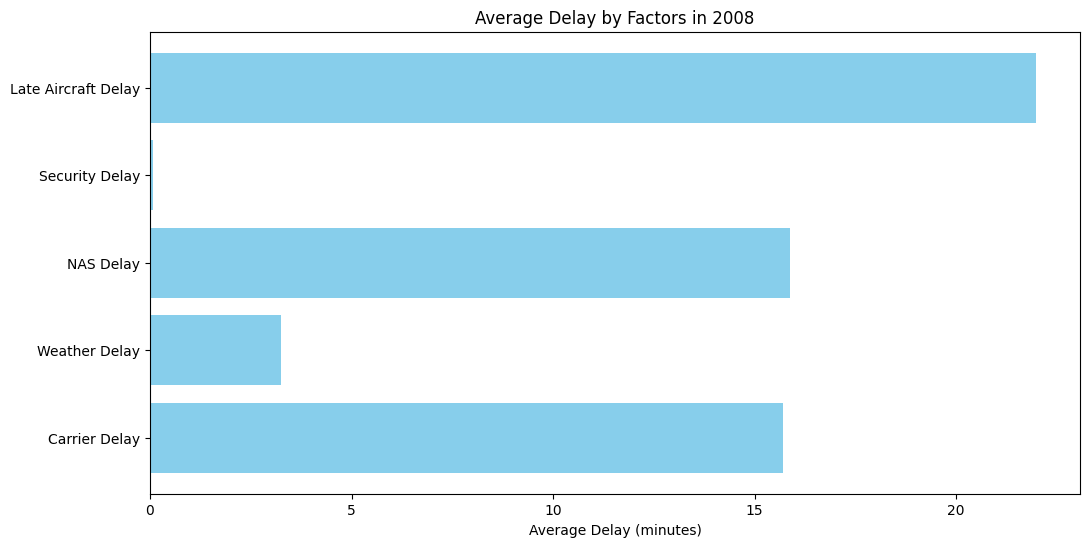

In [32]:
# Question 2: What are the primary factors contributing to flight delays?
# Primary Factors Contributing to Flight Delays
delay_factors = pd.read_csv('/content/avg_delays', header=None, names=['AvgCarrierDelay', 'AvgWeatherDelay', 'AvgNASDelay', 'AvgSecurityDelay', 'AvgLateAircraftDelay'])

# Prepare data for plotting
factors = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']
delays = delay_factors.iloc[0].tolist()
print(delays)

# Plot delay factors data
plt.figure(figsize=(12, 6))
plt.barh(factors, delays, color='skyblue')
plt.xlabel('Average Delay (minutes)')
plt.title('Average Delay by Factors in 2008')
plt.show()

This bar plot shows the average delay time for different factors that contributed to flight delays in 2008.

**Carrier Delay**: Average Delay is about 15 minutes. Carrier delays are due to circumstances within the airline's control, such as maintenance, crew problems, or aircraft cleaning.

**Weather Delay**:The average delay is around 3-4 minutes.
Explanation: Weather delays are caused by severe weather conditions that impact the safety and operation of flights.

**NAS (National Airspace System) Delay**: The average delay is approximately 15 minutes. NAS delays are caused by air traffic control, airport operations, heavy traffic volume, and other national airspace issues.

**Security Delay**: The average delay is very minimal. Security delays occur due to security-related issues such as increased security measures or security breaches.

**Late Aircraft Delay**: The average delay is around 20 minutes. This type of delay occurs when the incoming aircraft arrives late, causing subsequent delays for the departing flight.

Therefore, late aircraft delay is the main contributor to delays, followed by NAS Delay and Carrier Delay. Weather and Security Delays have a lesser impact on the overall delay times.

##**Factors Leading to Flight Cancellations**

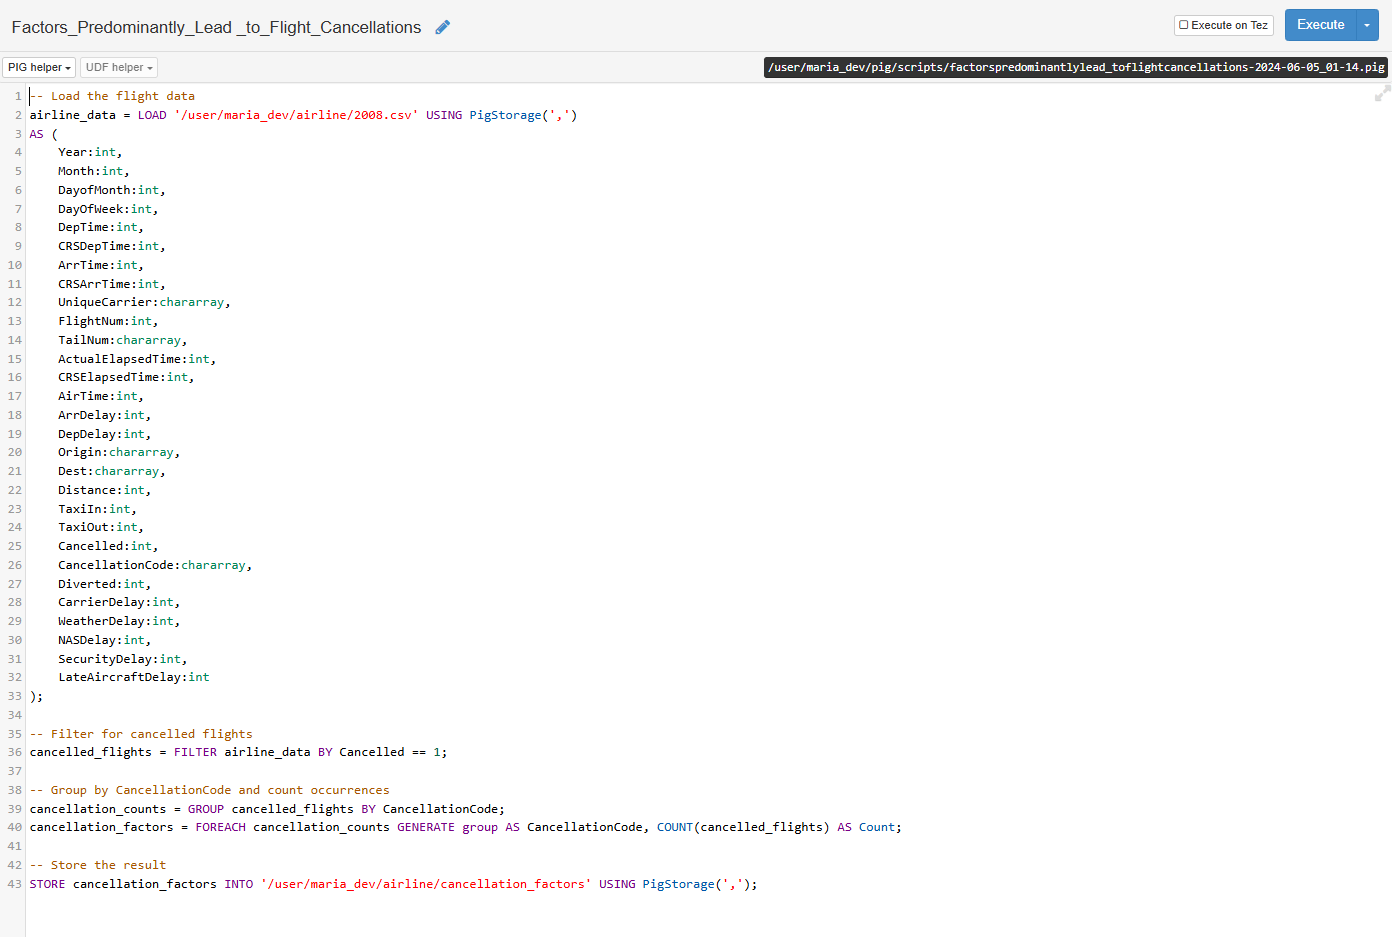

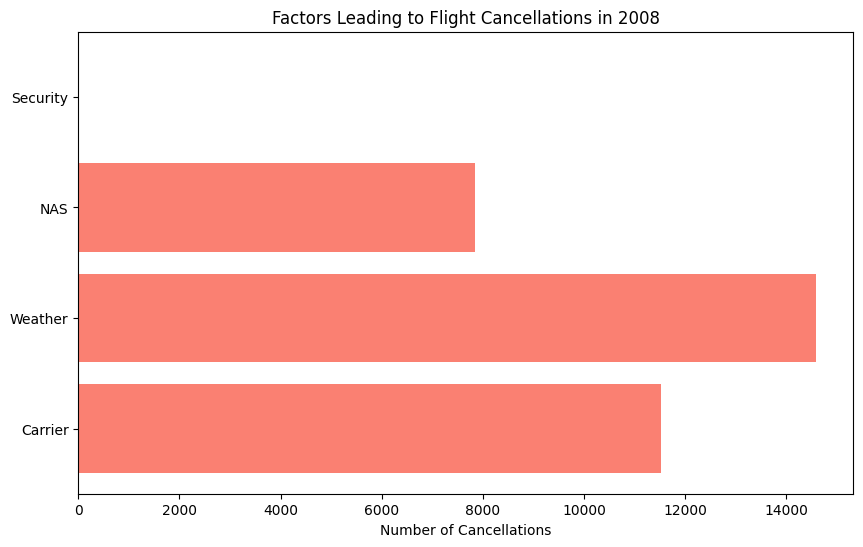

In [33]:
# Question 3: What factors predominantly lead to flight cancellations?
# Load cancellation factors data
cancellation_factors = pd.read_csv('/content/cancellation_factors', header=None, names=['CancellationCode', 'Count'])

# Map cancellation codes to their meanings
cancellation_factors['Reason'] = cancellation_factors['CancellationCode'].map({
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
})

# Prepare data for plotting
reasons = cancellation_factors['Reason']
counts = cancellation_factors['Count']

# Plot cancellation factors data
plt.figure(figsize=(10, 6))
plt.barh(reasons, counts, color='salmon')
plt.xlabel('Number of Cancellations')
plt.title('Factors Leading to Flight Cancellations in 2008')
plt.show()

This bar plot shows the number of flight cancellations in 2008 due to different factors.

**Weather**:The number of cancellations is around 14,000. Weather is the leading cause of flight cancellations. Severe weather conditions such as storms, snow, and fog can make it unsafe to operate flights.

**Carrier**: The number of cancellations approximately 8,000. Carrier-related issues are the second most common cause of cancellations. These can include mechanical problems, crew availability, and other operational challenges within the airline's control.

**NAS (National Airspace System)**: The number of cancellations is about 7,000. NAS-related cancellations are due to air traffic control issues, airport operations, and other factors within the national airspace system.

**Security**: The number of cancellations is very minimal, almost negligible. Security-related cancellations are the least common, occurring due to security threats, breaches, or increased security measures.

Therefore, weather is the primary factor leading to flight cancellations, followed by carrier and NAS-related issues. Security has the least impact on flight cancellations.


##**Flights with Most Frequent and Significant Delays and Cancellations**

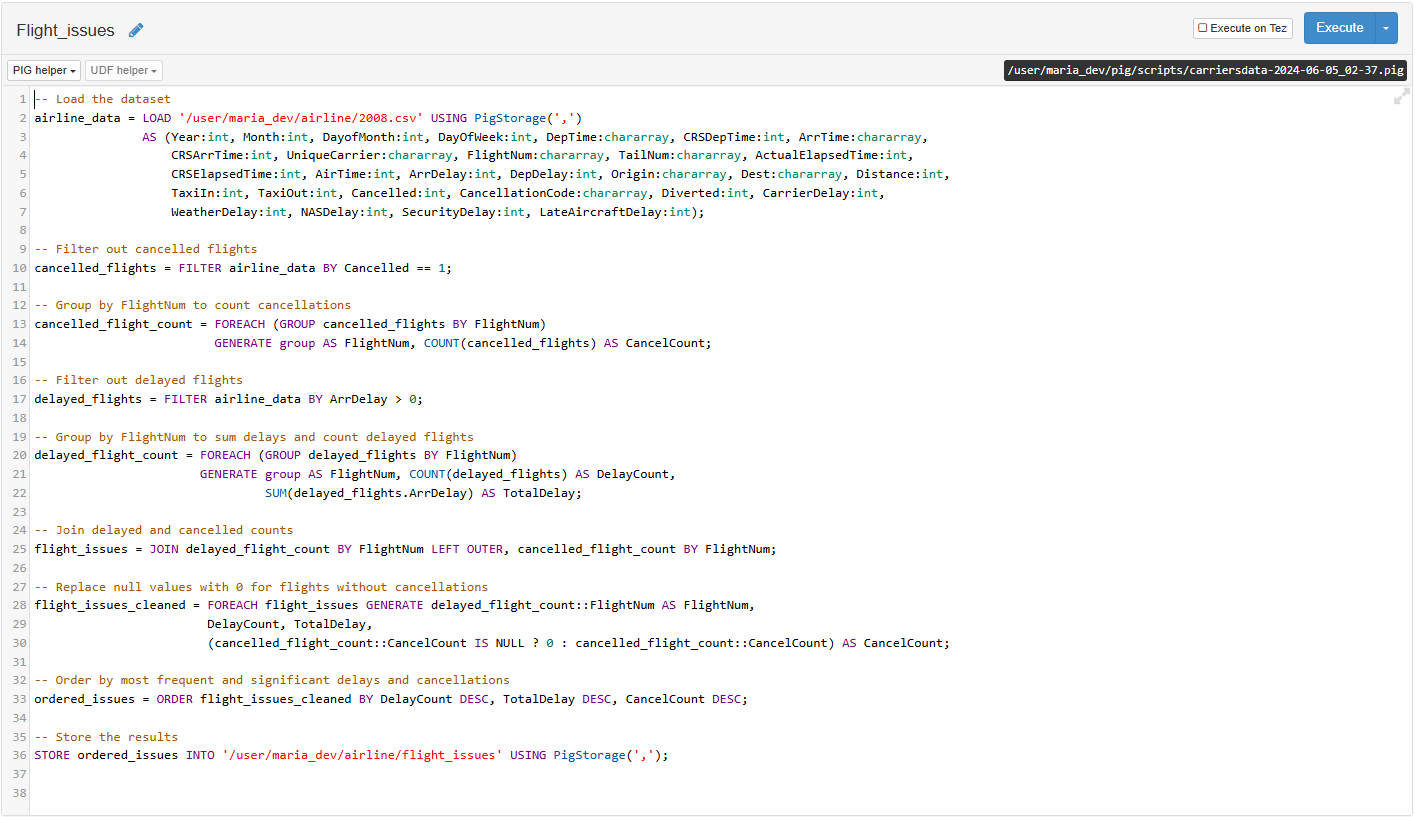

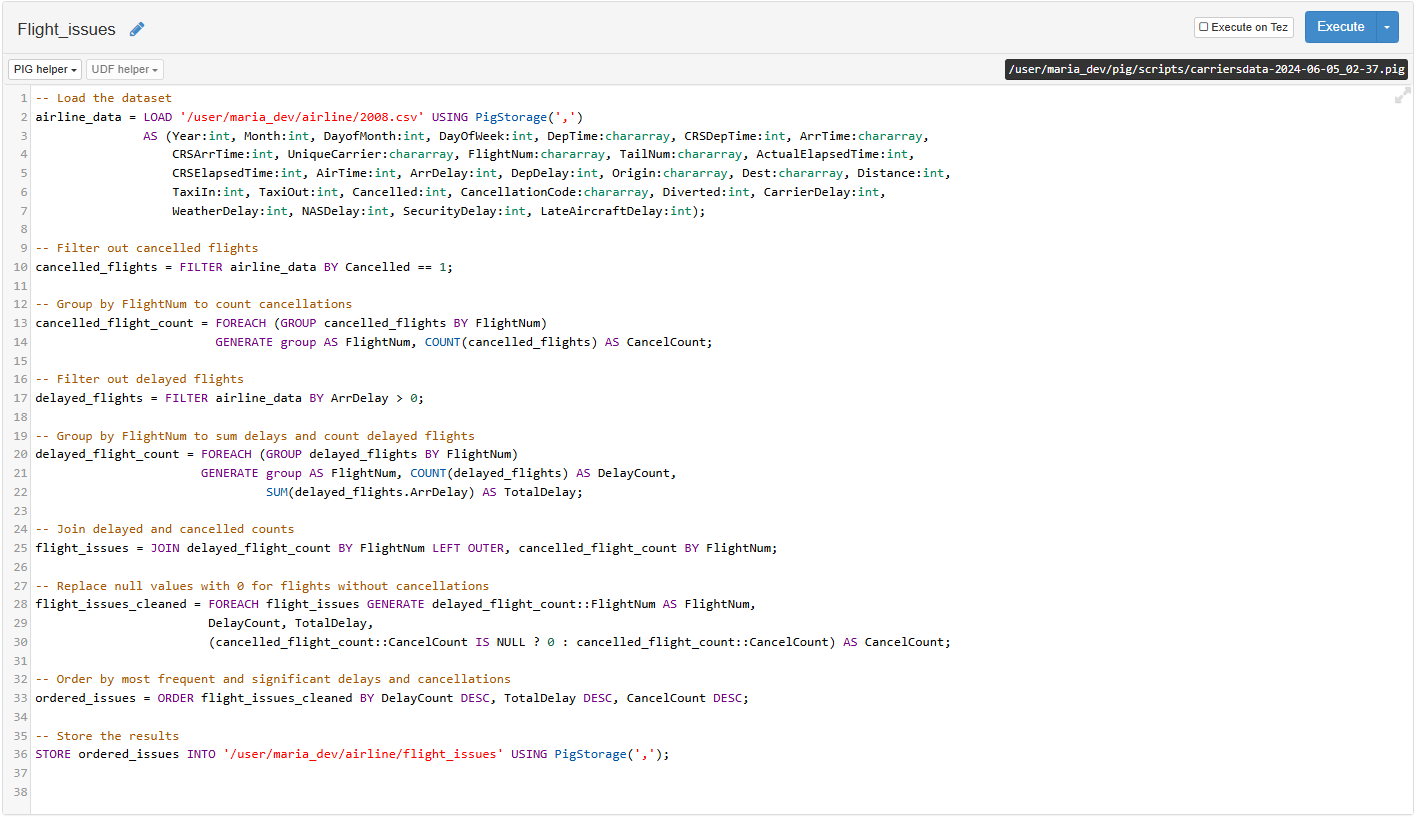

   FlightNum  DelayCount  TotalDelay  CancelCount
0        224         386       11782           15
1        619         365       12630           17
2        628         348       12684           11
3        534         335       11155           16
4        720         335        7977            9


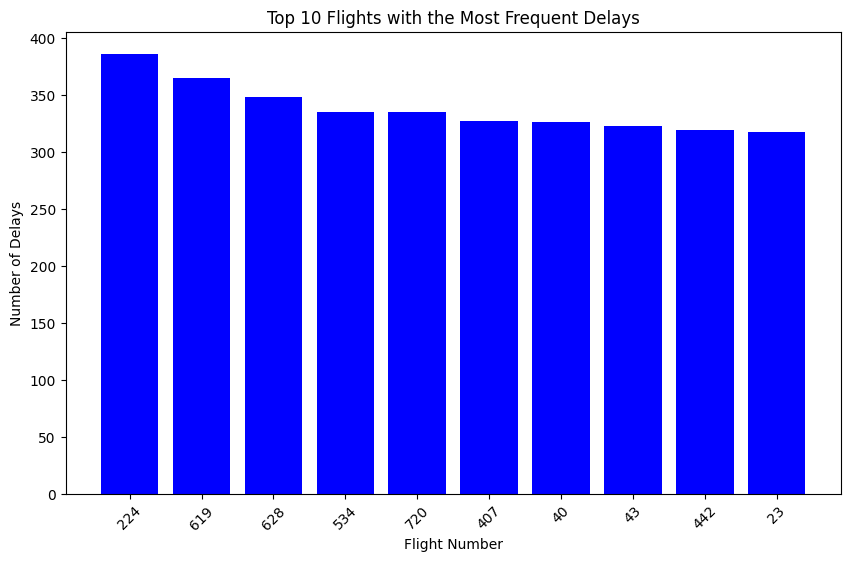

In [34]:
# Question 4: Which flight experiences the most frequent and significant delays and cancellations?
# Load the output file
output_data = pd.read_csv('/content/flight_issues', header=None)

# Define column names for better readability
output_data.columns = ['FlightNum', 'DelayCount', 'TotalDelay', 'CancelCount']

# Display the first few rows of the output data
print(output_data.head())

# Top 10 flights with the highest number of delays
top_delays = output_data.nlargest(10, 'DelayCount')

plt.figure(figsize=(10, 6))
plt.bar(top_delays['FlightNum'].astype(str), top_delays['DelayCount'], color='blue')
plt.xlabel('Flight Number')
plt.ylabel('Number of Delays')
plt.title('Top 10 Flights with the Most Frequent Delays')
plt.xticks(rotation=45)
plt.show()


This bar plot shows the flights with the most frequent delays in 2008.

**Flight 224**: Had the highest number of delays, with nearly 400 delays.

**Flights 619 and 628**: Also experienced high frequencies of delays, with around 350 delays each.

**Other Flights**: Flights 534, 720, 407, 40, 43, 442, and 23 all had over 300 delays.

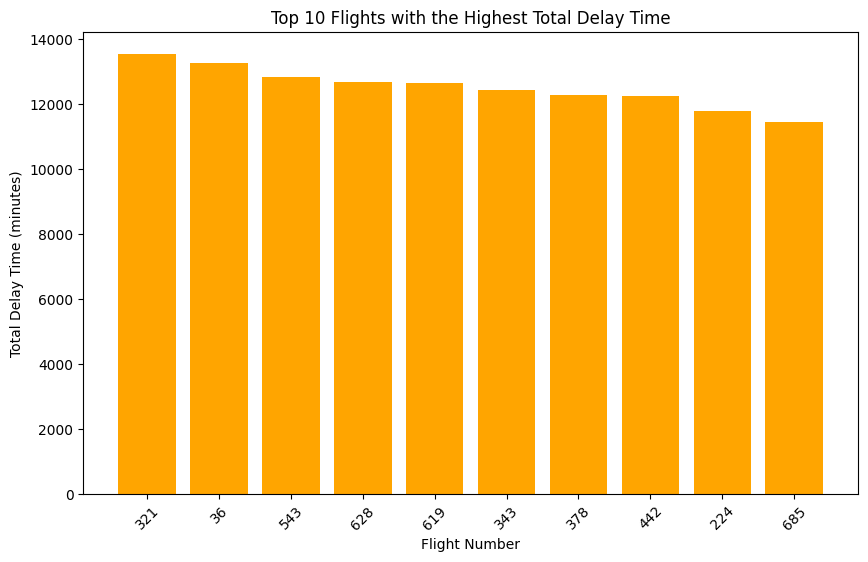

In [35]:
# Top 10 flights with the highest total delay time
top_total_delays = output_data.nlargest(10, 'TotalDelay')

plt.figure(figsize=(10, 6))
plt.bar(top_total_delays['FlightNum'].astype(str), top_total_delays['TotalDelay'], color='orange')
plt.xlabel('Flight Number')
plt.ylabel('Total Delay Time (minutes)')
plt.title('Top 10 Flights with the Highest Total Delay Time')
plt.xticks(rotation=45)
plt.show()

This bar plot shows the flights with the highest total delay time in minutes.

**Flight 321**: Had the highest total delay time, with nearly 14,000 minutes.

**Flights 36 and 543**: Had over 13,000 minutes of delay time each.

**Other Flights**: Flights 628, 619, 343, 378, 442, 224, and 685 all had substantial total delay times, exceeding 12,000 minutes.

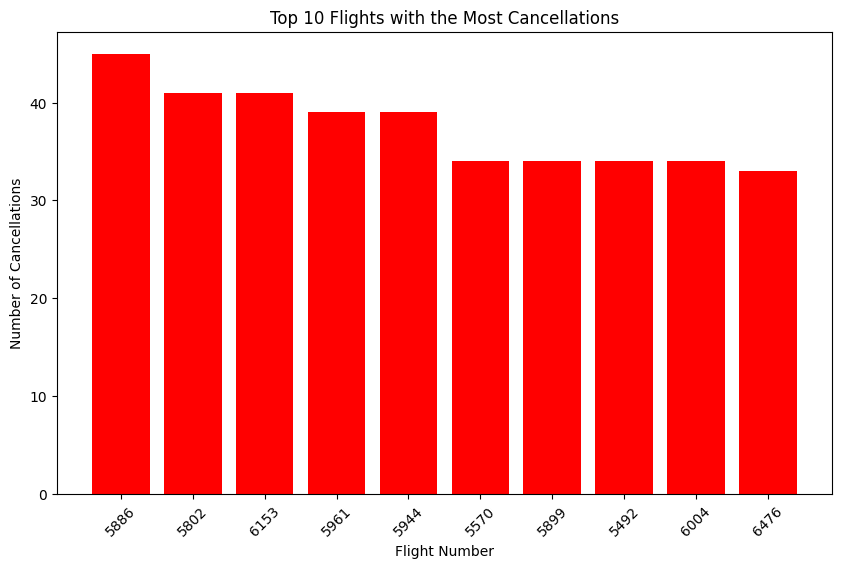

In [36]:
# Top 10 flights with the highest number of cancellations
top_cancellations = output_data.nlargest(10, 'CancelCount')

plt.figure(figsize=(10, 6))
plt.bar(top_cancellations['FlightNum'].astype(str), top_cancellations['CancelCount'], color='red')
plt.xlabel('Flight Number')
plt.ylabel('Number of Cancellations')
plt.title('Top 10 Flights with the Most Cancellations')
plt.xticks(rotation=45)
plt.show()

This bar plot shows the flights with the most cancellations in 2008.

**Flight 5866**: Had the highest number of cancellations, with over 40 cancellations.

**Flights 5802, 6153, and 5961**: Each had over 35 cancellations.

**Other Flights**: Flights 5944, 5570, 5899, 5492, 6004, and 6476 all had over 30 cancellations.

In summary, the most frequent delays is flight 224 had the most frequent delays.
Flight 321 had the highest total delay time and flight 5866 had the most cancellations. This analysis highlights the flights that were most frequently delayed, experienced the longest total delay times, and had the highest number of cancellations in 2008. This information can help airlines identify and address the issues leading to these delays and cancellations to improve overall performance and passenger satisfaction.

## **Conclusion**

###This analysis of the 2008 flight data shows when and why delays and cancellations happen. By understanding these patterns, airlines can make changes to improve their on-time performance and reduce cancellations. This will lead to better passenger satisfaction and more efficient operations. These findings and recommendations can help airlines improve their schedules, operations, and overall reliability.

## **Recommendation**

* Airlines should consider scheduling more flights during early morning hours and on weekends to minimize delays. Reduce the number of flights during peak delay times identified in the analysis.

* Address the primary factors contributing to delays, particularly focusing on reducing late aircraft and carrier-related delays. Enhance operational protocols and maintenance schedules to minimize delays.

* Develop and implement better weather prediction and response strategies to reduce cancellations caused by severe weather. Invest in technology and training to improve weather-related decision-making.

* Investigate and address issues specific to flights with frequent and significant delays and cancellations, such as flights 224, 321, and 5866. Implement targeted interventions to improve the performance of these high-risk flights.